# This is a test code

In [1]:
import graphlab

In [2]:
tmp = graphlab.SArray([1.,2.,3.])
tmp_cubed = tmp.apply(lambda x: x**3)
print tmp
print tmp_cubed

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1475601357.log


This non-commercial license of GraphLab Create for academic use is assigned to saranshagarwal_2k14@dtu.ac.in and will expire on September 05, 2017.
[1.0, 2.0, 3.0]
[1.0, 8.0, 27.0]


In [4]:
ex_sframe = graphlab.SFrame()
ex_sframe['power_1'] = tmp
ex_sframe['power_3'] = tmp_cubed
print ex_sframe

+---------+---------+
| power_1 | power_3 |
+---------+---------+
|   1.0   |   1.0   |
|   2.0   |   8.0   |
|   3.0   |   27.0  |
+---------+---------+
[3 rows x 2 columns]



In [7]:
def polynomial_sframe(feature,degree):
    poly_sframe = graphlab.SFrame()
    poly_sframe['power_1'] = feature
    if degree>1:
        for power in range(2,degree+1):
            name = 'power_' + str(power)
            poly_sframe[name] = feature**power
    return poly_sframe

In [8]:
print polynomial_sframe(tmp,3)

+---------+---------+---------+
| power_1 | power_2 | power_3 |
+---------+---------+---------+
|   1.0   |   1.0   |   1.0   |
|   2.0   |   4.0   |   8.0   |
|   3.0   |   9.0   |   27.0  |
+---------+---------+---------+
[3 rows x 3 columns]



In [11]:
sales = graphlab.SFrame('kc_house_data.gl/')

In [12]:
sales = sales.sort(['sqft_living', 'price'])

In [14]:
poly1_data = polynomial_sframe(sales['sqft_living'],1)
poly1_data['price'] = sales['price']

In [15]:
model1 = graphlab.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.019506     | 4362074.696077     | 261440.790724 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [16]:
model1.get("coefficients")

name,index,value,stderr
(intercept),None,-43579.0852515,4402.68969743
power_1,None,280.622770886,1.93639855513


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

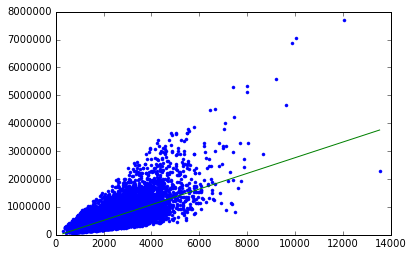

In [21]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',poly1_data['power_1'], model1.predict(poly1_data),'-')

In [2]:
import pandas as pd

In [3]:
pd.__version__

'0.18.1'

### 